In [3]:
import nlopt
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from optlib import optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

**Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [4]:
xraypath = 'C:/ORidzel/OPtical/optical-data-fit/Henke/'

In [5]:
A = [11.9637, 25.1598, 22.1380, 26.6971, 27.7229, 29.5537, 27.6149, 23.4497, 39.2408, 28.309, 28.4939, 22.4436, 16.7607, 19.9005, 41.9562]
gamma = [2.1, 2.2, 2.1, 2.6, 3.1, 4.0, 5.1, 6.1, 9.3, 11.6, 15.8, 16.6, 21.2, 22.3, 41.6]
omega = [9.3, 10.5, 11.9, 13.2, 14.6, 16.5, 18.7, 21.2, 24.2, 28.5, 32.0, 36.3, 44.6, 48.4 ,62.0]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0.25)
composition = opt.Composition(['c','o','h'], [5,2,8])
eloss = opt.linspace(opt.machine_eps,1000,0.1)
q = 0

pmma_drude = opt.Material('PMMA', oscillators, composition, eloss, q, xraypath)
pmma_drude.Eg = 6.7
pmma_drude.width_of_the_valence_band = 10
pmma_drude.atomic_density = 0.106
pmma_drude.electron_density = 0.284
pmma_drude.static_refractive_index = 1.48
pmma_drude.Z = 3.6
pmma_drude.omega_pl = np.sqrt(4*math.pi*pmma_drude.electron_density*opt.a0**3) * opt.h2ev
pmma_drude.q_dependency = 1
# pmma_drude.q_dependency = None

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


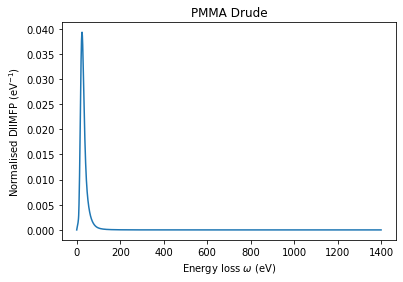

In [4]:
pmma_drude.plotDIIMFP(1400, decdigs=10)

In [6]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [7]:
opt_ = opt.OptFit(pmma_drude, x_exp, y_exp, 1600)

In [8]:
result = opt_.runOptimisation(maxeval = 500, xtol_rel = 1e-6)

In [9]:
oscOptimised = opt_.vec2Struct(result)

In [10]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [19.95463914 32.66072122 34.9604616  24.05855141 19.61146527 38.53514433
 31.01234043 40.099758   33.42396408 15.89907323 13.09437129 19.29075056
 12.81766505 13.50457814 42.46854046]
Gamma: [ 1.18700564  2.79977633  2.52199949  3.00768613  5.70978978  6.1197936
  7.5851804   7.75076709 12.77879959 20.12780873 30.85581706 30.14820382
 41.99418481 21.81223382 43.5843084 ]
Omega: [ 8.78127268  9.03845609  8.73240232 11.95151986 12.56670212 15.20974282
 24.41345252 18.71326996 33.37470987 48.20284487 47.89132492 64.33114862
 66.67386695 69.09570949 97.27490487]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


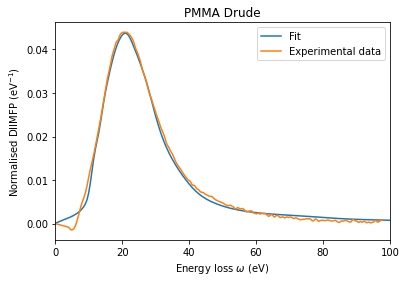

In [11]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
E = 
oscOptimised.plotIMFP()

In [10]:
fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

ValueError: cannot copy sequence with size 6 to array axis with dimension 3

In [ ]:
fd = pd.read_csv('../MATLAB/organic/dna/dna_physdat_die.txt',header=None,sep=' ')
exp_elf = fd.values
oscOptimised.calculateELF()

plt.figure()
plt.plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
plt.plot(exp_elf[:,0],exp_elf[:,3],label='Literature')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

**PTFE**

In [ ]:
A = [0.93,3.87,39.19,15.06,38.65,92.64,105,185,168.28]
gamma = [0.4,1.04,3.27,4.6,5.28,11.81,21.96,41.3,191.86]
omega = [7.94,12.38,15.57,19.54,20.42,26.11,36.96,52.95,86.83]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0.15)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_drude = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_drude.Eg = 7.2
ptfe_drude.width_of_the_valence_band = 5.5
ptfe_drude.atomic_density = 0.078
ptfe_drude.static_refractive_index = 1.39
ptfe_drude.electron_density = 0.47
ptfe_drude.Z = 8
ptfe_drude.omega_pl = np.sqrt(4*math.pi*ptfe_drude.electron_density*opt.a0**3) * opt.h2ev
ptfe_drude.q_dependency = 1

In [ ]:
fd = pd.read_csv('ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [ ]:
opt_ptfe = opt.OptFit(ptfe_drude, x_exp, y_exp, 1600)

In [ ]:
result_ptfe = opt_ptfe.runOptimisation()

In [ ]:
oscOptimised_ptfe = opt_ptfe.vec2Struct(result_ptfe)

In [ ]:
print(f'A: {oscOptimised_ptfe.oscillators.A}')
print(f'Gamma: {oscOptimised_ptfe.oscillators.gamma}')
print(f'Omega: {oscOptimised_ptfe.oscillators.omega}')

In [ ]:
oscOptimised_ptfe.calculateDIIMFP(opt_ptfe.E0)

plt.figure()
plt.plot(oscOptimised_ptfe.DIIMFP_E,oscOptimised_ptfe.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised_ptfe.name} {oscOptimised_ptfe.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
fsum = oscOptimised_ptfe.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised_ptfe.Z))

kksum = oscOptimised_ptfe.evaluateKKsum()
print('KKSum = {}'.format(kksum))

**Al**

In [ ]:
A = [210]
gamma = [0.53]
omega = [3]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0.3)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.7)
q = 0

M = 26.9815386 # Molar weight
rho = 2.6989 # g/cm3
N_Avogadro = 6.02217e23 

al_drude = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_drude.Ef = 11.2
al_drude.atomic_density = rho * N_Avogadro / M *1e-24
al_drude.static_refractive_index = 1.15
al_drude.electron_density = 0.2249
al_drude.omega_pl = np.sqrt(4*math.pi*al_drude.electron_density*opt.a0**3) * opt.h2ev
al_drude.Z = 13
al_drude.q_dependency = None

In [ ]:
fd = pd.read_csv('al_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [ ]:
opt_al = opt.OptFit(al_drude, x_exp, y_exp, 3400)

In [ ]:
result_al = opt_al.runOptimisation()

In [ ]:
oscOptimised_al = opt_al.vec2Struct(result_al)

In [ ]:
print(f'A: {oscOptimised_al.oscillators.A}')
print(f'Gamma: {oscOptimised_al.oscillators.gamma}')
print(f'Omega: {oscOptimised_al.oscillators.omega}')

In [ ]:
oscOptimised_al.calculateDIIMFP(opt_al.E0)

plt.figure()
plt.plot(oscOptimised_al.DIIMFP_E,oscOptimised_al.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised_al.name} {oscOptimised_al.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
fsum = oscOptimised_al.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised_al.Z))

kksum = oscOptimised_al.evaluateKKsum()
print('KKSum = {}'.format(kksum))